# `Test Train Split`

---

In [12]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_excel("Folds5x2_pp.xlsx")

In [18]:
data.shape

(9568, 5)

In [17]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [15]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


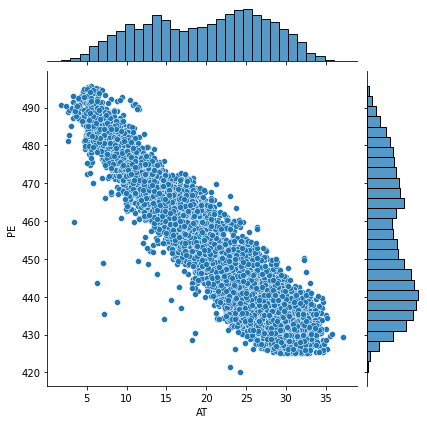

In [5]:
sns.jointplot(data["AT"],data["PE"])

### `AT and PE faces Hetroskedicity but good linear relationship`

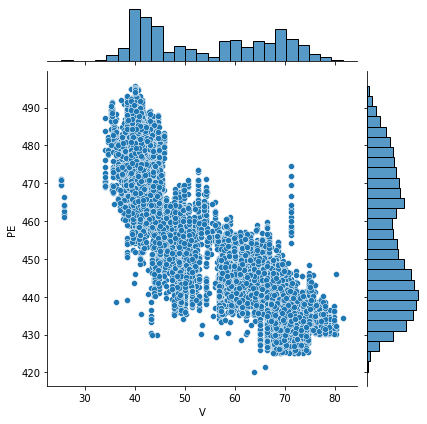

In [6]:
sns.jointplot(data["V"],data["PE"])

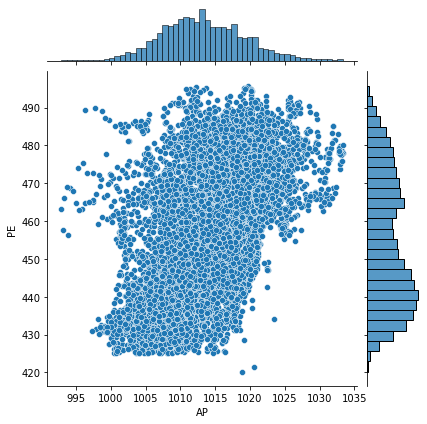

In [7]:
sns.jointplot(data["AP"],data["PE"])

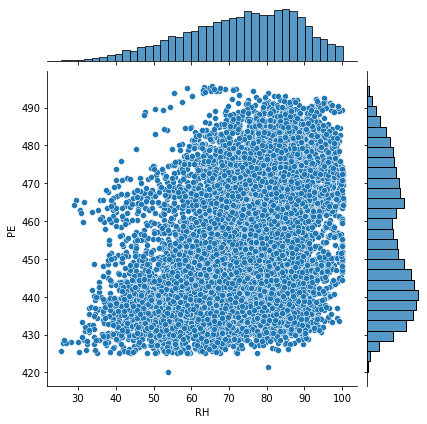

In [8]:
sns.jointplot(data["RH"],data["PE"])

### `RH vs PE do not qualify cut-off of 5, Hence RH to be dropped`

In [9]:
data.drop("RH",axis=1,inplace=True)

In [19]:
data.sample(10)

,AT,V,AP,RH,PE
3637,4.56,40.27,1011.13,80.24,493.87
9249,19.51,66.51,1015.28,80.75,448.04
4611,22.59,59.43,1005.85,84.02,442.00
5730,27.46,61.86,1012.39,66.09,439.72
3605,8.52,38.50,1013.16,64.06,482.96
4901,15.51,41.76,1022.81,69.55,463.82
6060,22.32,64.27,1014.35,82.98,446.62
5581,24.16,66.05,1016.45,73.27,443.75
3116,14.86,44.71,1018.30,49.46,466.38
2381,21.69,57.17,1011.75,82.63,446.61


### `shuffling of dataset`

In [20]:
data = data.sample(frac=1)

### `we select 2 best contributor to predict`

In [21]:
X = data[["AT","AP"]]
y = data["PE"]

### `split the dataset`

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=78)

### `fit the model`

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.coef_

array([-2.12368953,  0.13767934])

In [25]:
model.intercept_

356.5327171917686

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([443.50548955, 473.90978023, 434.07258555, ..., 483.68618561,
       451.94125807, 433.11878651])

## `Test accuracy`

In [28]:
import math
from sklearn.metrics import r2_score, mean_squared_error
print("R2_score = {}".format(r2_score(y_test, y_pred)))
print("mean square error = {}".format(mean_squared_error(y_test, y_pred)))
print("root mean square error = {}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

R2_score = 0.8979394386346468
mean square error = 29.37718917108164
root mean square error = 5.420072801271367


## `Train Accuracy`

In [29]:
y_pred_train = model.predict(X_train)

print("R2_score = {}".format(r2_score(y_train, y_pred_train)))
print("mean square error = {}".format(mean_squared_error(y_train, y_pred_train)))
print("root mean square error = {}".format(math.sqrt(mean_squared_error(y_train, y_pred_train))))

R2_score = 0.9014770548549175
mean square error = 28.776824774828636
root mean square error = 5.364403487325374


### `Model works well, as there is a minute difference between train acuracy and Test Accuracy`

## `End -------------------`